<a href="https://colab.research.google.com/github/daniellemsampaio/Projetos/blob/main/MIT_Smart_Manufacturing_M3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **MIT - SMART MANUFATURING**
**Aluna**: Danielle Mendes de Almeida Sampaio

**Módulo 03 - Atividade avaliável: Circuito Fechado**

Aprimoramos o FrED com o sistema de circuito fechado. Nesta atividade, vamos analisar os dados desse sistema aprimorado e representá-los graficamente. Em seguida, vamos comparar o gráfico com o sistema de circuito aberto e descrever o desempenho do sistema operacional.

Para realizar a atividade, siga o roteiro a seguir:

* Analise os dados de execução do sistema aprimorado e crie um gráfico de séries temporais, um histograma e um gráficos de frequência;
* Compare esses dados com os gráficos do sistema de circuito aberto;
* Compare a média, a variância ou qualquer outro valor que represente o desempenho do sistema em operação.

In [ ]:
# Importar as Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.fft import fft, ifft

plt.style.use('seaborn-pastel')

**Sistema de Circuito Fechado**

In [ ]:
# Carregar os dados do Sistema de Circuito Fechado e visualização prévia
df_SCF = pd.read_excel('MITPE_Smart_Manufacturing_Module3_Experiment ClosedLoop_Improved_system__[PT].xlsx')
df_SCF_FFT = pd.read_excel('MITPE_Smart_Manufacturing_Module3_Experiment ClosedLoop_Improved_system__[PT]_FFT.xlsx')
print('O dataframe possui',len(df_SCF),'registros organizados em',len(df_SCF.columns),'colunas.')
print('')
df_SCF.head()

O dataframe possui 1000 registros organizados em 10 colunas.



,Tempo - Velocidade medida,Rotações bobina/seg - Velocidade medida,Tempo - Diâmetro medido,Diâmetro (mm) - Diâmetro medido,Tempo - Velocidade alvo,Rotações bobina/seg - Velocidade alvo,Tempo - Diâmetro solicitado,Diâmetro (mm)- Diâmetro solicitado,Tempo - Temperatura,Diâmetro (mm) - Temperatura
0,43,0.866667,43,0.272907,43,1.12094,43,0.3,43,94.4892
1,44,0.966667,44,0.272907,44,1.12094,44,0.3,44,94.4892
2,45,1.000000,45,0.272907,45,1.12094,45,0.3,45,94.9280
3,46,1.033330,46,0.272907,46,1.12094,46,0.3,46,94.9280
4,47,1.066670,47,0.272907,47,1.12094,47,0.3,47,94.9280


Nos gráficos a seguir podemos observar o comportamento das variáveis em função do tempo: Sistema de Circuito Fechado



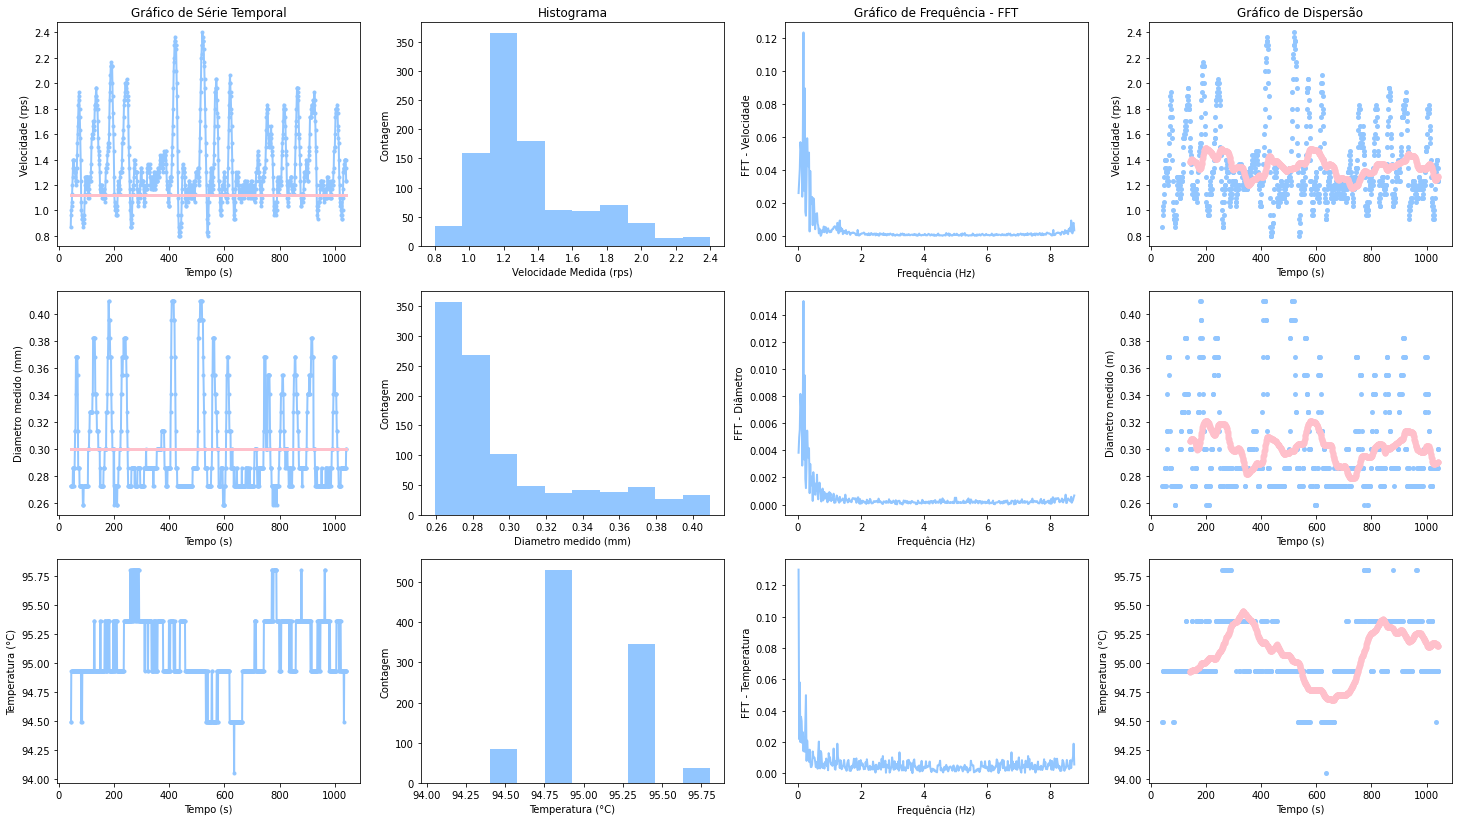

In [ ]:
# Representar graficamente as variáveis em função do tempo: Sistema de Circuito Fechado
print('Nos gráficos a seguir podemos observar o comportamento das variáveis em função do tempo: Sistema de Circuito Fechado')
print('')

plt.figure(figsize=(25, 14))

plt.subplot(3, 4, 1)
plt.plot(df_SCF[['Tempo - Velocidade medida']],df_SCF[['Rotações bobina/seg - Velocidade medida']],marker='.',linewidth=2)
plt.plot(df_SCF[['Tempo - Velocidade alvo']],df_SCF[['Rotações bobina/seg - Velocidade alvo']],color = 'pink',linewidth=3)
plt.title('Gráfico de Série Temporal')
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade (rps)')

plt.subplot(3, 4, 2)
plt.hist(df_SCF['Rotações bobina/seg - Velocidade medida'])
plt.title('Histograma')
plt.xlabel('Velocidade Medida (rps)')
plt.ylabel('Contagem')

plt.subplot(3, 4, 3)
plt.plot(df_SCF_FFT[['Frequência']].values[1:450],df_SCF_FFT[['Amplitude - velocidade']].values[1:450],linewidth=2)
plt.title('Gráfico de Frequência - FFT')
plt.xlabel('Frequência (Hz)')
plt.ylabel('FFT - Velocidade')

plt.subplot(3, 4, 4)
plt.scatter(df_SCF[['Tempo - Velocidade medida']],df_SCF[['Rotações bobina/seg - Velocidade medida']],marker='.',linewidth=2)
plt.scatter(df_SCF[['Tempo - Velocidade medida']],df_SCF[['Rotações bobina/seg - Velocidade medida']].rolling(100).mean(),marker='.',color = 'pink',linewidth=3)
plt.title('Gráfico de Dispersão')
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade (rps)')

plt.subplot(3, 4, 5)
plt.plot(df_SCF[['Tempo - Diâmetro medido']],df_SCF[['Diâmetro (mm) - Diâmetro medido']],marker='.',linewidth=2)
plt.plot(df_SCF[['Tempo - Diâmetro solicitado']],df_SCF[['Diâmetro (mm)- Diâmetro solicitado']],color = 'pink',linewidth=3)
plt.xlabel('Tempo (s)')
plt.ylabel('Diametro medido (mm)')

plt.subplot(3, 4, 6)
plt.hist(df_SCF['Diâmetro (mm) - Diâmetro medido'])
plt.xlabel('Diametro medido (mm)')
plt.ylabel('Contagem')

plt.subplot(3, 4, 7)
plt.plot(df_SCF_FFT[['Frequência']].values[1:450],df_SCF_FFT[['Amplitude - diametro']].values[1:450],linewidth=2)
plt.xlabel('Frequência (Hz)')
plt.ylabel('FFT - Diâmetro')

plt.subplot(3, 4, 8)
plt.scatter(df_SCF[['Tempo - Diâmetro medido']],df_SCF[['Diâmetro (mm) - Diâmetro medido']],marker='.',linewidth=2)
plt.scatter(df_SCF[['Tempo - Diâmetro medido']],df_SCF[['Diâmetro (mm) - Diâmetro medido']].rolling(100).mean(),marker='.',color = 'pink',linewidth=3)
plt.xlabel('Tempo (s)')
plt.ylabel('Diametro medido (m)')

plt.subplot(3, 4, 9)
plt.plot(df_SCF[['Tempo - Temperatura']],df_SCF[['Diâmetro (mm) - Temperatura']],marker='.',linewidth=2)
plt.xlabel('Tempo (s)')
plt.ylabel('Temperatura (°C)')

plt.subplot(3, 4, 10)
plt.hist(df_SCF['Diâmetro (mm) - Temperatura'])
plt.xlabel('Temperatura (°C)')
plt.ylabel('Contagem')

plt.subplot(3, 4, 11)
plt.plot(df_SCF_FFT[['Frequência']].values[1:450],df_SCF_FFT[['Amplitude - temperatura']].values[1:450],linewidth=2)
plt.xlabel('Frequência (Hz)')
plt.ylabel('FFT - Temperatura')

plt.subplot(3, 4, 12)
plt.scatter(df_SCF[['Tempo - Temperatura']],df_SCF[['Diâmetro (mm) - Temperatura']],marker='.',linewidth=2)
plt.scatter(df_SCF[['Tempo - Temperatura']],df_SCF[['Diâmetro (mm) - Temperatura']].rolling(100).mean(),marker='.',color = 'pink',linewidth=3)
plt.xlabel('Tempo (s)')
plt.ylabel('Temperatura (°C)')

plt.show()

Nos gráficos a seguir podemos observar a relação entre a velocidade e a temperatura com o Diâmetro: Sistema de Circuito Fechado



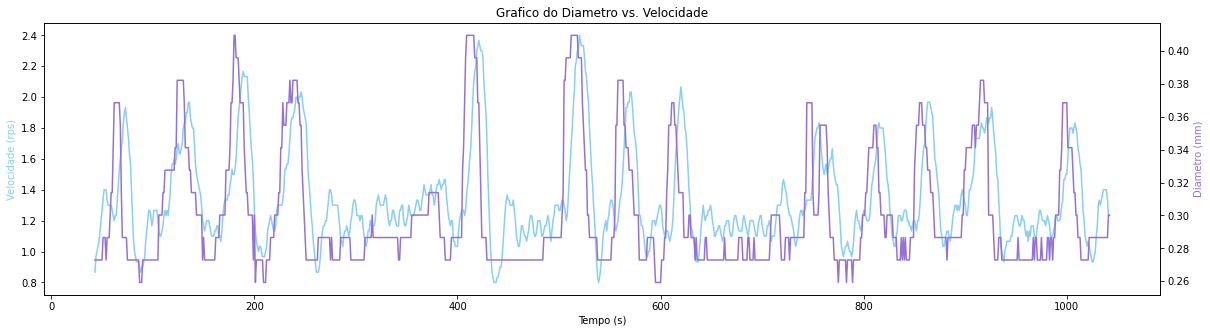

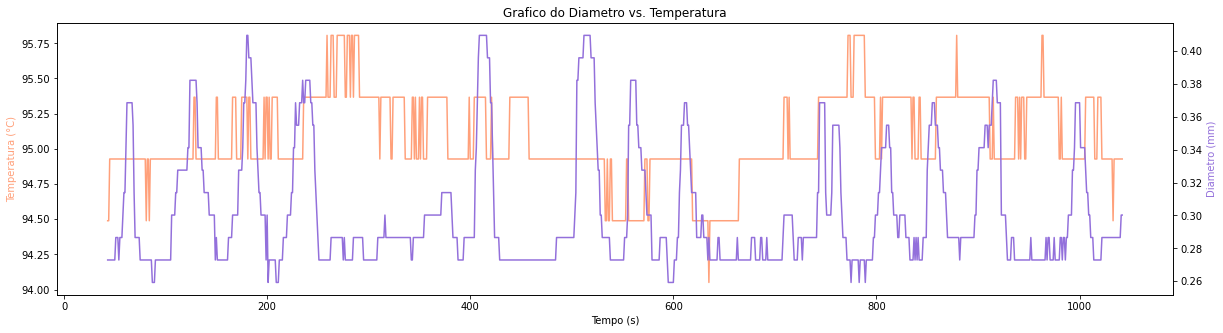

In [ ]:
# Representar graficamente a correlação entre duas variáveis: Sistema de Circuito Fechado
print('Nos gráficos a seguir podemos observar a relação entre a velocidade e a temperatura com o Diâmetro: Sistema de Circuito Fechado')
print('')

plt.rcParams['figure.figsize'] = [20, 5]

fig,ax = plt.subplots()
ax.plot(df_SCF[['Tempo - Velocidade medida']], df_SCF[['Rotações bobina/seg - Velocidade medida']],color='lightskyblue')
ax.set_xlabel('Tempo (s)')
ax.set_ylabel('Velocidade (rps)',color='lightskyblue')
ax2=ax.twinx()
ax2.plot(df_SCF[['Tempo - Diâmetro medido']], df_SCF[['Diâmetro (mm) - Diâmetro medido']],color='mediumpurple')
ax2.set_ylabel('Diametro (mm)',color='mediumpurple')
plt.title('Grafico do Diametro vs. Velocidade')
plt.show()

fig,ax = plt.subplots()
ax.plot(df_SCF[['Tempo - Temperatura']],df_SCF[['Diâmetro (mm) - Temperatura']],color='lightsalmon')
ax.set_xlabel('Tempo (s)')
ax.set_ylabel('Temperatura (°C)',color='lightsalmon')
ax2=ax.twinx()
ax2.plot(df_SCF[['Tempo - Diâmetro medido']], df_SCF[['Diâmetro (mm) - Diâmetro medido']],color='mediumpurple')
ax2.set_ylabel('Diametro (mm)',color='mediumpurple')
plt.title('Grafico do Diametro vs. Temperatura')
plt.show()

In [ ]:
# Análise de estatística descritiva: Sistema de Circuito Fechado
print('Na tabela abaixo podemos observar os dados estatísticos da média, mediana e variância das amostras: Sistema de Circuito Fechado')
print('')
df_SCF[['Rotações bobina/seg - Velocidade medida','Diâmetro (mm) - Diâmetro medido','Diâmetro (mm) - Temperatura']].describe()

Na tabela abaixo podemos observar os dados estatísticos da média, mediana e variância das amostras: Sistema de Circuito Fechado



,Rotações bobina/seg - Velocidade medida,Diâmetro (mm) - Diâmetro medido,Diâmetro (mm) - Temperatura
count,1000.000000,1000.000000,1000.000000
mean,1.343700,0.300863,95.075141
std,0.307367,0.036132,0.303966
min,0.800000,0.259236,94.050700
25%,1.133330,0.272907,94.928000
50%,1.233330,0.286577,94.928000
75%,1.466670,0.313918,95.367100
max,2.400000,0.409611,95.806600


**Sistema de Circuito Aberto**

In [ ]:
# Carregar os dados do Sistema de Circuito Aberto e visualização prévia
df_SCA = pd.read_excel('MITPE_Smart_Manufacturing_Module3_Experiment OpenLoop_System__[PT].xlsx')
df_SCA_FFT = pd.read_excel('MITPE_Smart_Manufacturing_Module3_Experiment OpenLoop_System__[PT]_FFT.xlsx')
print('O dataframe possui',len(df_SCA),'registros organizados em',len(df_SCA.columns),'colunas.')
print('')
df_SCA.head()

O dataframe possui 1000 registros organizados em 12 colunas.



,Tempo - Velocidade medida,Rotações bobina/seg - Velocidade medida,Tempo - Diâmetro medido,Diâmetro (mm) - Diâmetro medido,Tempo - Velocidade alvo,Rotações bobina/seg - Velocidade alvo,Tempo - Diâmetro previsto,Diâmetro (mm) - Diâmetro previsto,Tempo - Temperatura,Diâmetro (mm) - Temperatura,Tempo - Direção do estágio,Rotações bobina/seg - Direção do estágio
0,6081,1.033330,6081,0.354929,6081,1,6081,0.317624,6081,94.928,6081,1
1,6082,1.066670,6082,0.354929,6082,1,6082,0.317624,6082,94.928,6082,1
2,6083,1.033330,6083,0.354929,6083,1,6083,0.317624,6083,94.928,6083,1
3,6084,1.033330,6084,0.368600,6084,1,6084,0.317624,6084,94.928,6084,1
4,6085,0.966667,6085,0.382270,6085,1,6085,0.317624,6085,94.928,6085,1


Nos gráficos a seguir podemos observar o comportamento das variáveis em função do tempo: Sistema de Circuito Aberto



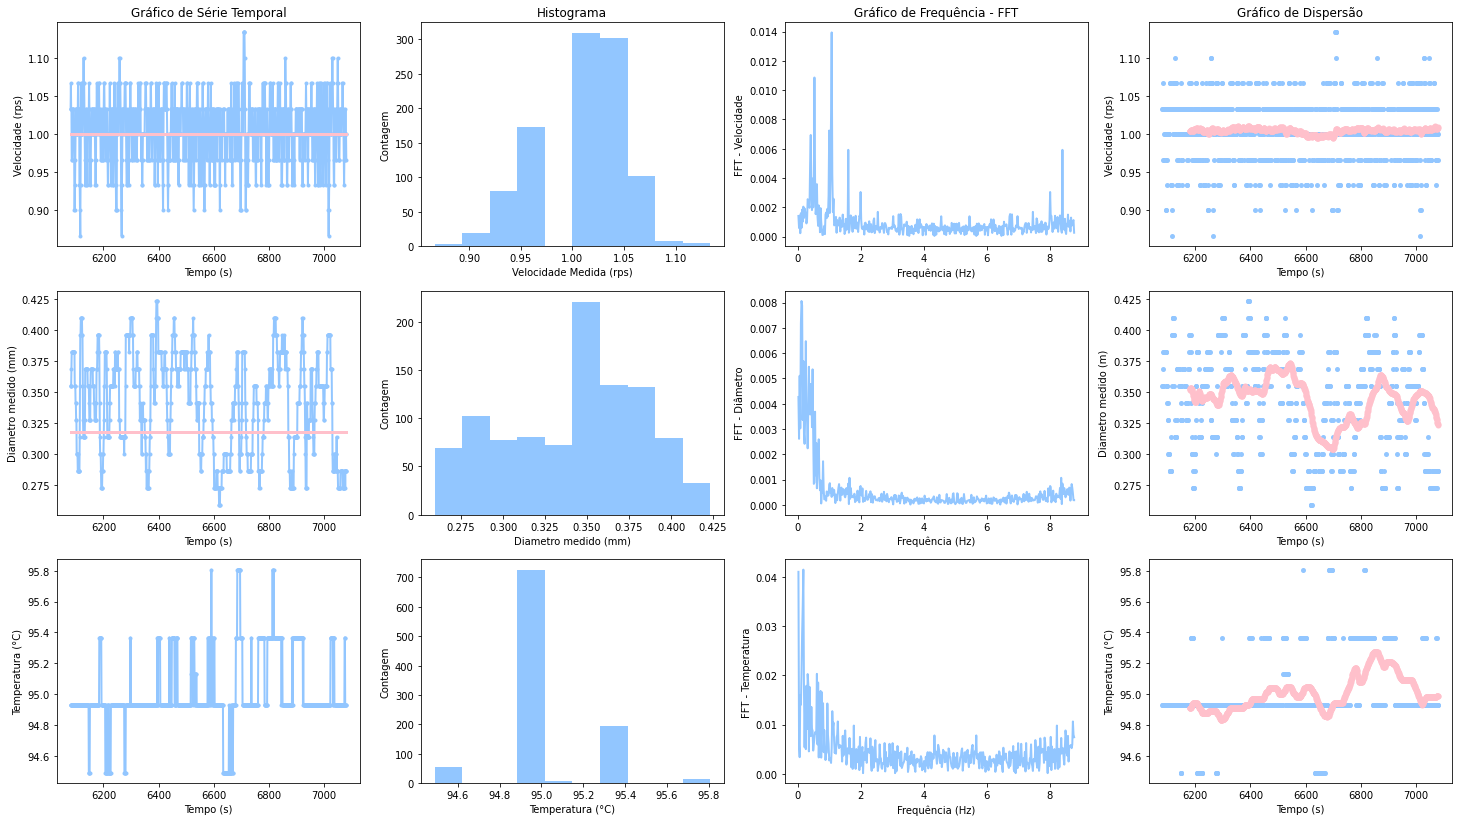

In [ ]:
# Representar graficamente as variáveis em função do tempo: Sistema de Circuito Aberto
print('Nos gráficos a seguir podemos observar o comportamento das variáveis em função do tempo: Sistema de Circuito Aberto')
print('')

plt.figure(figsize=(25, 14))

plt.subplot(3, 4, 1)
plt.plot(df_SCA[['Tempo - Velocidade medida']],df_SCA[['Rotações bobina/seg - Velocidade medida']],marker='.',linewidth=2)
plt.plot(df_SCA[['Tempo - Velocidade alvo']],df_SCA[['Rotações bobina/seg - Velocidade alvo']],color = 'pink',linewidth=3)
plt.title('Gráfico de Série Temporal')
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade (rps)')

plt.subplot(3, 4, 2)
plt.hist(df_SCA['Rotações bobina/seg - Velocidade medida'])
plt.title('Histograma')
plt.xlabel('Velocidade Medida (rps)')
plt.ylabel('Contagem')

plt.subplot(3, 4, 3)
plt.plot(df_SCA_FFT[['Frequência']].values[1:450],df_SCA_FFT[['Amplitude - velocidade']].values[1:450],linewidth=2)
plt.title('Gráfico de Frequência - FFT')
plt.xlabel('Frequência (Hz)')
plt.ylabel('FFT - Velocidade')

plt.subplot(3, 4, 4)
plt.scatter(df_SCA[['Tempo - Velocidade medida']],df_SCA[['Rotações bobina/seg - Velocidade medida']],marker='.',linewidth=2)
plt.scatter(df_SCA[['Tempo - Velocidade medida']],df_SCA[['Rotações bobina/seg - Velocidade medida']].rolling(100).mean(),marker='.',color = 'pink',linewidth=3)
plt.title('Gráfico de Dispersão')
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade (rps)')

plt.subplot(3, 4, 5)
plt.plot(df_SCA[['Tempo - Diâmetro medido']],df_SCA[['Diâmetro (mm) - Diâmetro medido']],marker='.',linewidth=2)
plt.plot(df_SCA[['Tempo - Diâmetro previsto']],df_SCA[['Diâmetro (mm) - Diâmetro previsto']],color = 'pink',linewidth=3)
plt.xlabel('Tempo (s)')
plt.ylabel('Diametro medido (mm)')

plt.subplot(3, 4, 6)
plt.hist(df_SCA['Diâmetro (mm) - Diâmetro medido'])
plt.xlabel('Diametro medido (mm)')
plt.ylabel('Contagem')

plt.subplot(3, 4, 7)
plt.plot(df_SCA_FFT[['Frequência']].values[1:450],df_SCA_FFT[['Amplitude - diametro']].values[1:450],linewidth=2)
plt.xlabel('Frequência (Hz)')
plt.ylabel('FFT - Diâmetro')

plt.subplot(3, 4, 8)
plt.scatter(df_SCA[['Tempo - Diâmetro medido']],df_SCA[['Diâmetro (mm) - Diâmetro medido']],marker='.',linewidth=2)
plt.scatter(df_SCA[['Tempo - Diâmetro medido']],df_SCA[['Diâmetro (mm) - Diâmetro medido']].rolling(100).mean(),marker='.',color = 'pink',linewidth=3)
plt.xlabel('Tempo (s)')
plt.ylabel('Diametro medido (m)')

plt.subplot(3, 4, 9)
plt.plot(df_SCA[['Tempo - Temperatura']],df_SCA[['Diâmetro (mm) - Temperatura']],marker='.',linewidth=2)
plt.xlabel('Tempo (s)')
plt.ylabel('Temperatura (°C)')

plt.subplot(3, 4, 10)
plt.hist(df_SCA['Diâmetro (mm) - Temperatura'])
plt.xlabel('Temperatura (°C)')
plt.ylabel('Contagem')

plt.subplot(3, 4, 11)
plt.plot(df_SCA_FFT[['Frequência']].values[1:450],df_SCA_FFT[['Amplitude - temperatura']].values[1:450],linewidth=2)
plt.xlabel('Frequência (Hz)')
plt.ylabel('FFT - Temperatura')

plt.subplot(3, 4, 12)
plt.scatter(df_SCA[['Tempo - Temperatura']],df_SCA[['Diâmetro (mm) - Temperatura']],marker='.',linewidth=2)
plt.scatter(df_SCA[['Tempo - Temperatura']],df_SCA[['Diâmetro (mm) - Temperatura']].rolling(100).mean(),marker='.',color = 'pink',linewidth=3)
plt.xlabel('Tempo (s)')
plt.ylabel('Temperatura (°C)')

plt.show()

Nos gráficos a seguir podemos observar a relação entre a velocidade e a temperatura com o Diâmetro: Sistema de Circuito Aberto



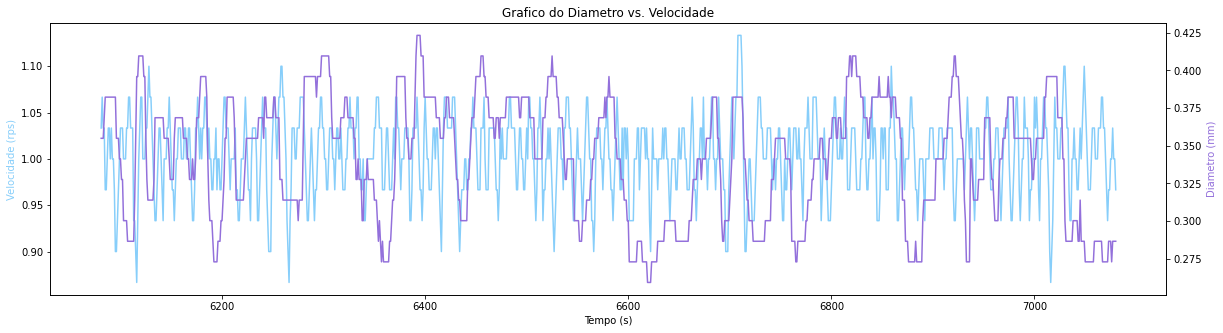

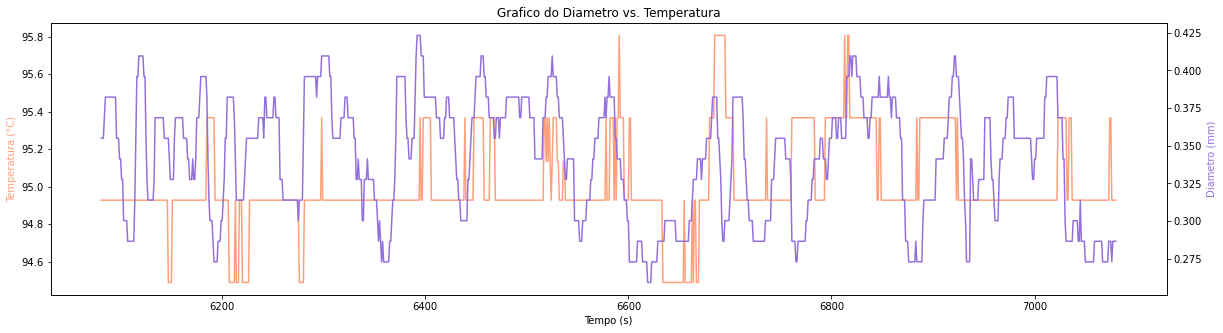

In [ ]:
# Representar graficamente a correlação entre duas variáveis: Sistema de Circuito Aberto
print('Nos gráficos a seguir podemos observar a relação entre a velocidade e a temperatura com o Diâmetro: Sistema de Circuito Aberto')
print('')

plt.rcParams['figure.figsize'] = [20, 5]

fig,ax = plt.subplots()
ax.plot(df_SCA[['Tempo - Velocidade medida']], df_SCA[['Rotações bobina/seg - Velocidade medida']],color='lightskyblue')
ax.set_xlabel('Tempo (s)')
ax.set_ylabel('Velocidade (rps)',color='lightskyblue')
ax2=ax.twinx()
ax2.plot(df_SCA[['Tempo - Diâmetro medido']], df_SCA[['Diâmetro (mm) - Diâmetro medido']],color='mediumpurple')
ax2.set_ylabel('Diametro (mm)',color='mediumpurple')
plt.title('Grafico do Diametro vs. Velocidade')
plt.show()

fig,ax = plt.subplots()
ax.plot(df_SCA[['Tempo - Temperatura']],df_SCA[['Diâmetro (mm) - Temperatura']],color='lightsalmon')
ax.set_xlabel('Tempo (s)')
ax.set_ylabel('Temperatura (°C)',color='lightsalmon')
ax2=ax.twinx()
ax2.plot(df_SCA[['Tempo - Diâmetro medido']], df_SCA[['Diâmetro (mm) - Diâmetro medido']],color='mediumpurple')
ax2.set_ylabel('Diametro (mm)',color='mediumpurple')
plt.title('Grafico do Diametro vs. Temperatura')
plt.show()

In [ ]:
# Análise de estatística descritiva: Sistema de Circuito Aberto
print('Na tabela abaixo podemos observar os dados estatísticos da média, mediana e variância das amostras: Sistema de Circuito Aberto')
print('')
df_SCA[['Rotações bobina/seg - Velocidade medida','Diâmetro (mm) - Diâmetro medido','Diâmetro (mm) - Temperatura']].describe()

Na tabela abaixo podemos observar os dados estatísticos da média, mediana e variância das amostras: Sistema de Circuito Aberto



,Rotações bobina/seg - Velocidade medida,Diâmetro (mm) - Diâmetro medido,Diâmetro (mm) - Temperatura
count,1000.000000,1000.000000,1000.000000
mean,1.004799,0.342093,95.003437
std,0.041349,0.039822,0.234210
min,0.866667,0.259236,94.489200
25%,0.966667,0.313918,94.928000
50%,1.000000,0.354929,94.928000
75%,1.033330,0.368600,94.928000
max,1.133330,0.423281,95.806600


**Comentários Gerais:**

Nesta atividade foram feitas as visualizações temporais de dois datasets: sistema de circuito fechado e sistema de circuito aberto. 

Nos gráficos do sistema de circuito fechado do FrED, foi possível observar uma alta correlação entre a velocidade medida e o diâmetro medido, nas quais as alterações no diâmetro afetavam diretamente a velocidade; este comportamento evidencia a utilização do sistema de realimentação (feedback). Além disso, também é possível observar que esse sistema de controle faz uma compensação na velocidade para atingir o diâmetro desejado, uma vez que a velocidade alvo é de 1,20 rps e a média de velocidade observada é de 1,34 rps. Por sua vez, a média do diâmetro medido está muito mais próxima do diâmetro alvo de 0,30 mm.

Nos gráficos do sistema de circuito aberto do FrED, por sua vez, observamos que a média da velovidade medida e a velocidade alvo estão muito próximas em 1 rps, isto se deve ao controle da velocidade. No entanto, o diâmetro médio de 0,34 mm se mostra ligeiramente mais espesso do que o diâmetro alvo, de 0,318 mm. Esses comportamentos indicam que para atingir o diâmetro alvo, faz muito mais sentido utilizar um sistema de circuito fechado, onde o principal ponto de controle seja o diâmetro.

Outro ponto relevante a ser observado se refere a temperatura, que em ambos os sistemas, se mantém estável em 95°C.